<a href="https://colab.research.google.com/github/SyedWaqar-ah/practiceInColab/blob/master/model1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.datasets import mnist

#mnist = tf.keras.datasets._mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()



Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


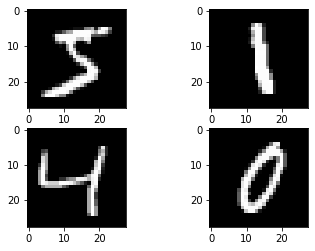

In [11]:
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3001], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
train_images = train_images/255
test_images = test_images/255
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(512, activation = tf.nn.relu), tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 1.3946 - acc: 0.6782 - val_loss: 0.7042 - val_acc: 0.8381
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5527 - acc: 0.8630 - val_loss: 0.4384 - val_acc: 0.8860
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4057 - acc: 0.8899 - val_loss: 0.3628 - val_acc: 0.9010
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3514 - acc: 0.9021 - val_loss: 0.3246 - val_acc: 0.9078
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3227 - acc: 0.9085 - val_loss: 0.3026 - val_acc: 0.9143
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3040 - acc: 0.9128 - val_loss: 0.2918 - val_acc: 0.9148
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2896 - acc: 0.9167 - val_loss: 0.

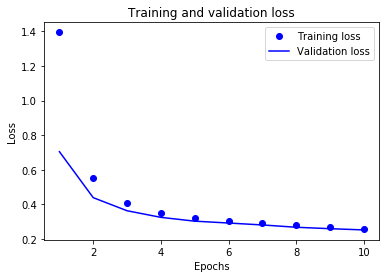

<Figure size 432x288 with 0 Axes>

In [8]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

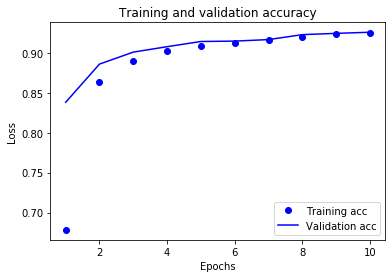

10000/10000 [==============================] - 1s 86us/sample - loss: 0.2520 - acc: 0.9259


[0.2519763592928648, 0.9259]

In [9]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model.evaluate(test_images, test_labels)